In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("salary_dataset.csv")
df


,age,experience,salary
0,22,0,18000
1,23,1,22000
2,24,1,24000
3,25,2,28000
4,26,3,32000
5,27,3,35000
6,28,4,40000
7,29,5,48000
8,30,6,55000
9,31,7,62000


In [3]:
df.describe()


,age,experience,salary
count,23.000000,23.000000,23.000000
mean,32.739130,8.869565,134304.347826
std,7.281467,6.791066,193648.799912
min,22.000000,0.000000,18000.000000
25%,27.500000,3.000000,37500.000000
50%,32.000000,8.000000,78000.000000
75%,37.500000,13.500000,125000.000000
max,50.000000,25.000000,900000.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         23 non-null     int64
 1   experience  23 non-null     int64
 2   salary      23 non-null     int64
dtypes: int64(3)
memory usage: 684.0 bytes


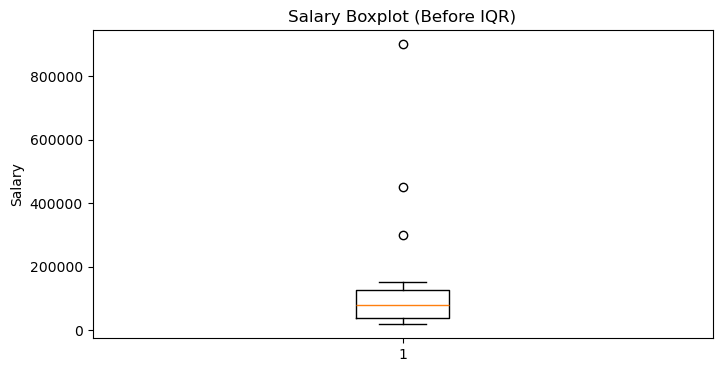

In [9]:
plt.figure(figsize=(8,4))
plt.boxplot(df["salary"])
plt.title("Salary Boxplot (Before IQR)")
plt.ylabel("Salary")
plt.show()


In [11]:
#NOW PERFORMING IQR FOR OUTLIER REMOVE

Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Q1, Q3, IQR, lower_bound, upper_bound


(37500.0, 125000.0, 87500.0, -93750.0, 256250.0)

In [13]:
iqr_outliers = df[
    (df["salary"] < lower_bound) | 
    (df["salary"] > upper_bound)
]

iqr_outliers


,age,experience,salary
20,28,2,300000
21,45,20,450000
22,50,25,900000


In [17]:
#removing outlier 

df_iqr_clean = df[
    (df["salary"] >= lower_bound) & 
    (df["salary"] <= upper_bound)
]

df_iqr_clean


,age,experience,salary
0,22,0,18000
1,23,1,22000
2,24,1,24000
3,25,2,28000
4,26,3,32000
5,27,3,35000
6,28,4,40000
7,29,5,48000
8,30,6,55000
9,31,7,62000


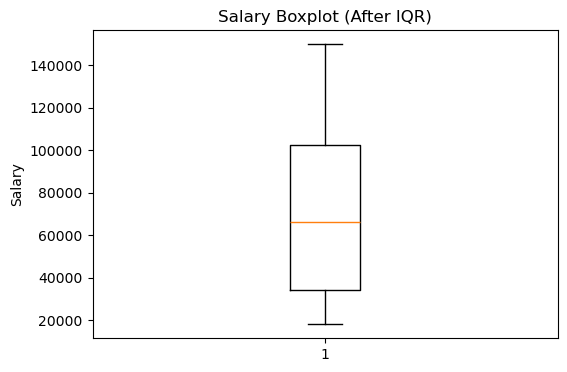

In [21]:
#VISULAIZING DATA
plt.figure(figsize=(6,4))
plt.boxplot(df_iqr_clean["salary"])
plt.title("Salary Boxplot (After IQR)")
plt.ylabel("Salary")
plt.show()


In [25]:
#NOW APPLYING DBSCAN 
from sklearn.preprocessing import StandardScaler

X = df[["age", "experience", "salary"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=3)
labels = dbscan.fit_predict(X_scaled)

df["dbscan_label"] = labels
df


,age,experience,salary,dbscan_label
0,22,0,18000,0
1,23,1,22000,0
2,24,1,24000,0
3,25,2,28000,0
4,26,3,32000,0
5,27,3,35000,0
6,28,4,40000,0
7,29,5,48000,0
8,30,6,55000,0
9,31,7,62000,0


In [29]:
dbscan_outliers = df[df["dbscan_label"] == -1]
dbscan_outliers


,age,experience,salary,dbscan_label
20,28,2,300000,-1
21,45,20,450000,-1
22,50,25,900000,-1


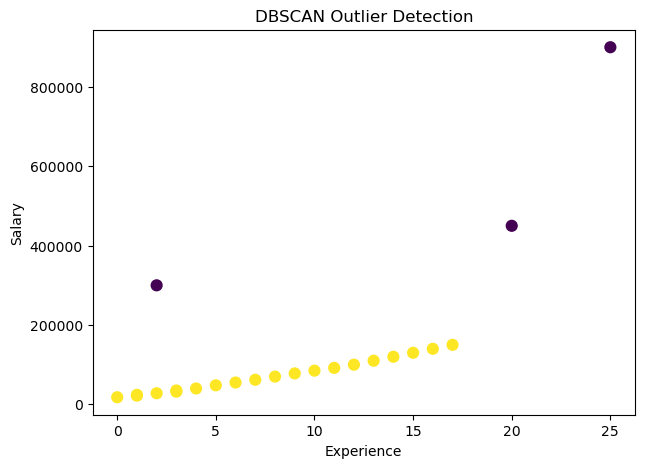

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(
    df["experience"],
    df["salary"],
    c=df["dbscan_label"],
    cmap="viridis",
    s=60
)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("DBSCAN Outlier Detection")
plt.show()


In [33]:
#CLEANONG DATSET
df_dbscan_clean = df[df["dbscan_label"] != -1]
df_dbscan_clean


,age,experience,salary,dbscan_label
0,22,0,18000,0
1,23,1,22000,0
2,24,1,24000,0
3,25,2,28000,0
4,26,3,32000,0
5,27,3,35000,0
6,28,4,40000,0
7,29,5,48000,0
8,30,6,55000,0
9,31,7,62000,0
